# Predict Customer Stratification Rating

### Context
The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

| Columns | Description |
|---------|-------------|
|Invoice id|Computer generated sales slip invoice identification number|
|Branch|Branch of supercenter (3 branches are available identified by A, B and C)|
|City|Location of supercenters|
|Customer type|Type of customers, recorded by Members for customers using member card and Normal for without member card|
|Gender|Gender type of customer|
|Product line|General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel|
|Unit price|Price of each product in $|
|Quantity|Number of products purchased by customer|
|Tax|5% tax fee for customer buying|
|Total|Total price including tax|
|Date|Date of purchase (Record available from January 2019 to March 2019)|
|Time|Purchase time (10am to 9pm)|
|Payment|Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)|
|COGS|Cost of goods sold|
|Gross margin percentage|Gross margin percentage|
|Gross income|Gross income|
|Rating|Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)|

**Link to the Dataset : https://www.kaggle.com/mahmoudeletrby/supermarket**

## 1. Data Collection

In [1]:
#Import Library Package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import Dataset
df = pd.read_excel('dataset/supermarket.xls')

In [3]:
#Checking Shape of Dataset
print(df.shape)
df.head()

(1000, 14)


,invoiceID,branch,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,gross income,rating
0,101-17-6199,A,Cairo,Normal,Male,Food and beverages,45.79,7,2019-03-13,19:44:00,Credit card,320.53,16.0265,7.0
1,101-81-4070,C,Alexandria,Member,Female,Health and beauty,62.82,2,2019-01-17,12:36:00,eWallet,125.64,6.2820,4.9
2,102-06-2002,C,Alexandria,Member,Male,Sports and travel,25.25,5,2019-03-20,17:52:00,Cash,126.25,6.3125,6.1
3,102-77-2261,C,Alexandria,Member,Male,Health and beauty,65.31,7,2019-03-05,18:02:00,Credit card,457.17,22.8585,4.2
4,105-10-6182,A,Cairo,Member,Male,Fashion accessories,21.48,2,2019-02-27,12:22:00,eWallet,42.96,2.1480,6.6


In [4]:
#Checking Data Type Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoiceID     1000 non-null   object        
 1   branch        1000 non-null   object        
 2   city          1000 non-null   object        
 3   cust_type     1000 non-null   object        
 4   gender        1000 non-null   object        
 5   type          1000 non-null   object        
 6   unit_price    1000 non-null   float64       
 7   quantity      1000 non-null   int64         
 8   date          1000 non-null   datetime64[ns]
 9   time          1000 non-null   object        
 10  payment       1000 non-null   object        
 11  cost          1000 non-null   float64       
 12  gross income  1000 non-null   float64       
 13  rating        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 109.5+ KB


In [5]:
#Summary Statistic Check for Continuous Value
df.describe()

,unit_price,quantity,cost,gross income,rating
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,307.58738,15.379369,6.97270
std,26.494628,2.923431,234.17651,11.708825,1.71858
min,10.080000,1.000000,10.17000,0.508500,4.00000
25%,32.875000,3.000000,118.49750,5.924875,5.50000
50%,55.230000,5.000000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,448.90500,22.445250,8.50000
max,99.960000,10.000000,993.00000,49.650000,10.00000


## 2. Data Wrangling

In [6]:
#Checking Missing Value
df.isnull().sum()

invoiceID       0
branch          0
city            0
cust_type       0
gender          0
type            0
unit_price      0
quantity        0
date            0
time            0
payment         0
cost            0
gross income    0
rating          0
dtype: int64

In [7]:
#Checking duplicated value in dataset using invoiceID column
df.duplicated().sum()

0

In [8]:
df['date'].dt.year.unique()

array([2019], dtype=int64)

**Because only year 2019, we can delete it and split the column date into month and day for feature engineering purposes.**

In [9]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop('date',axis=1,inplace=True)

**And also we can transform time columns into only hour and separate them by Morning, Afternoon, Night**

In [10]:
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
df.drop('time',axis=1,inplace=True)

In [11]:
df['hour'] = df['hour'].apply(lambda x: 'Morning' if (x>=10)&(x<14) else
                                        'Afternoon' if (x>=14)&(x<18) else
                                        'Night')

In [12]:
df.head()

,invoiceID,branch,city,cust_type,gender,type,unit_price,quantity,payment,cost,gross income,rating,month,day,hour
0,101-17-6199,A,Cairo,Normal,Male,Food and beverages,45.79,7,Credit card,320.53,16.0265,7.0,3,13,Night
1,101-81-4070,C,Alexandria,Member,Female,Health and beauty,62.82,2,eWallet,125.64,6.2820,4.9,1,17,Morning
2,102-06-2002,C,Alexandria,Member,Male,Sports and travel,25.25,5,Cash,126.25,6.3125,6.1,3,20,Afternoon
3,102-77-2261,C,Alexandria,Member,Male,Health and beauty,65.31,7,Credit card,457.17,22.8585,4.2,3,5,Night
4,105-10-6182,A,Cairo,Member,Male,Fashion accessories,21.48,2,eWallet,42.96,2.1480,6.6,2,27,Morning


In [13]:
df.nunique()

invoiceID       1000
branch             3
city               3
cust_type          2
gender             2
type               6
unit_price       943
quantity          10
payment            3
cost             990
gross income     990
rating            61
month              3
day               31
hour               3
dtype: int64

## 3. Data Visualization

### Univariate Analysis

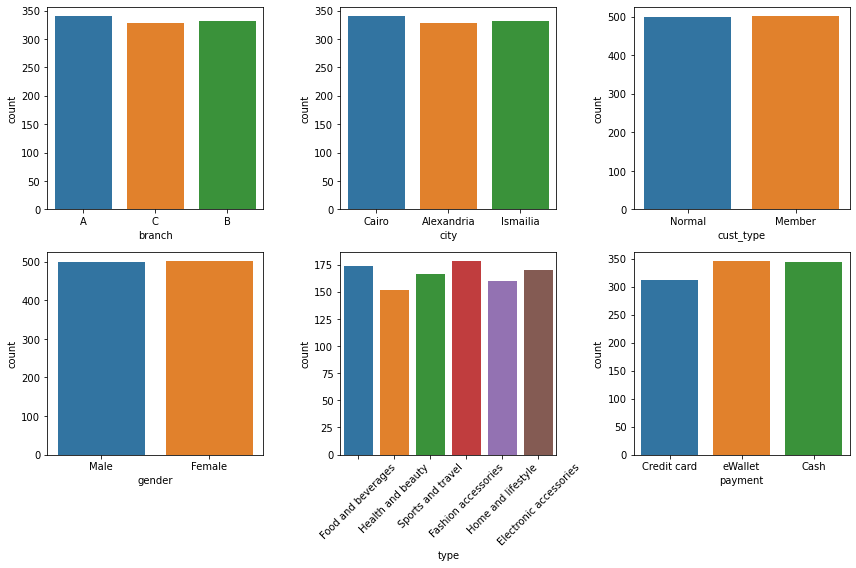

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
sns.countplot('branch',data=df,ax=axes[0,0])
sns.countplot('city',data=df,ax=axes[0,1])
sns.countplot('cust_type',data=df,ax=axes[0,2])
sns.countplot('gender',data=df,ax=axes[1,0])
t = sns.countplot('type',data=df,ax=axes[1,1])
t.set_xticklabels(t.get_xticklabels(),rotation=45)
sns.countplot('payment',data=df,ax=axes[1,2])
plt.tight_layout()
plt.show()

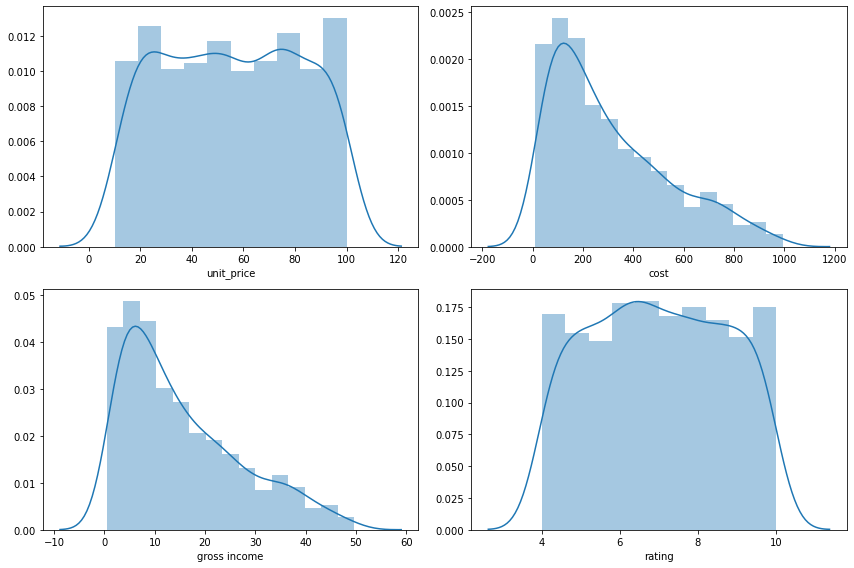

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
sns.distplot(df['unit_price'],ax=axes[0,0])
sns.distplot(df['cost'],ax=axes[0,1])
sns.distplot(df['gross income'],ax=axes[1,0])
sns.distplot(df['rating'],ax=axes[1,1])
plt.tight_layout()
plt.show()

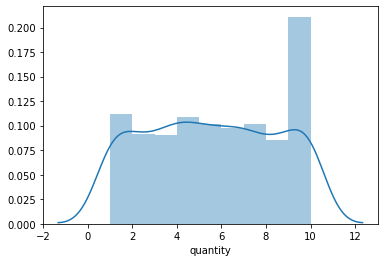

In [16]:
sns.distplot(df['quantity'])
plt.show()

### Bivariate Analysis

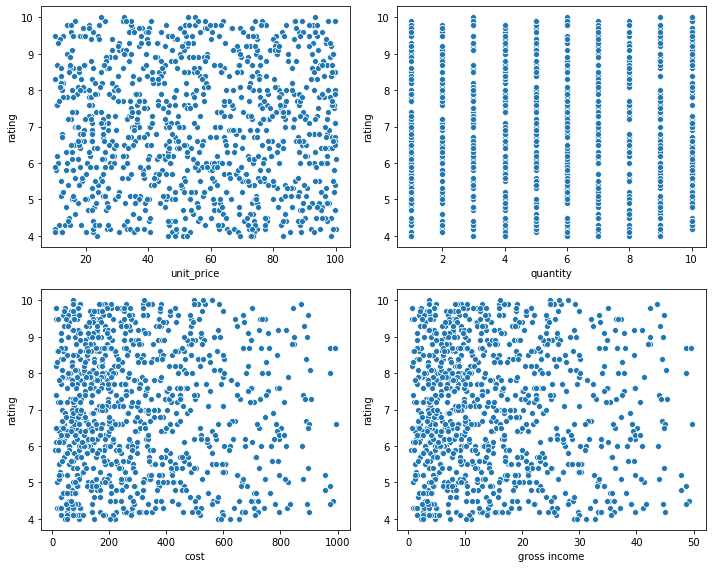

In [17]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
sns.scatterplot(data=df,x='unit_price',y='rating',ax=axes[0,0])
sns.scatterplot(data=df,x='quantity',y='rating',ax=axes[0,1])
sns.scatterplot(data=df,x='cost',y='rating',ax=axes[1,0])
sns.scatterplot(data=df,x='gross income',y='rating',ax=axes[1,1])
plt.tight_layout()
plt.show()

It seems that there is no correlation between the continuous independent variable and its dependent variable. Therefore we will use the KNearest Neighbor, Decision Tree and Random Forest regression algorithms.

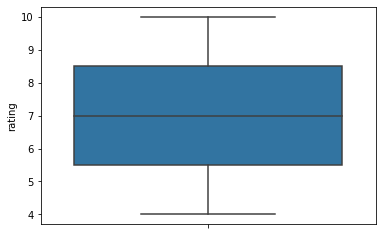

In [18]:
sns.boxplot(y='rating',data=df)
plt.show()

There is no **Outlier** in Target Variable column.

### Multivariate Analysis

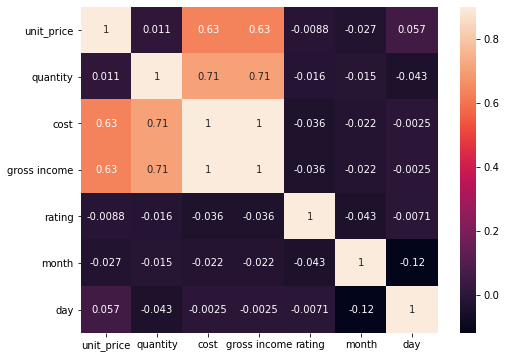

In [19]:
cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor, vmax=0.9, annot=True)
plt.show()

## 4. Modelling

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [21]:
x = df.drop(['rating','invoiceID'], axis=1)
y = df['rating']

In [22]:
#Drop first function is to 
x = pd.get_dummies(x, drop_first=True)

In [23]:
x.head()

,unit_price,quantity,cost,gross income,month,day,branch_B,branch_C,city_Cairo,city_Ismailia,...,gender_Male,type_Fashion accessories,type_Food and beverages,type_Health and beauty,type_Home and lifestyle,type_Sports and travel,payment_Credit card,payment_eWallet,hour_Morning,hour_Night
0,45.79,7,320.53,16.0265,3,13,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1,62.82,2,125.64,6.2820,1,17,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
2,25.25,5,126.25,6.3125,3,20,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,65.31,7,457.17,22.8585,3,5,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
4,21.48,2,42.96,2.1480,2,27,0,0,1,0,...,1,1,0,0,0,0,0,1,1,0


In [24]:
#Split dataset into training and test data.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=23)

In [25]:
models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))

In [26]:
rmse = []
r2s = []
names = []
for name, model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    rmse_score = np.sqrt(mean_squared_error(y_test, pred))
    r2 = -r2_score(y_test, pred)
    rmse.append(rmse_score)
    r2s.append(r2)
    names.append(name)
    msg = "Model {0} have {1:.4f} of RMSE Score and {2:.4f} of R2 Score".format(name, rmse_score, r2)
    print(msg)

Model KNN have 1.9386 of RMSE Score and 0.1696 of R2 Score
Model DT have 2.4932 of RMSE Score and 0.9346 of R2 Score
Model RF have 1.8505 of RMSE Score and 0.0658 of R2 Score


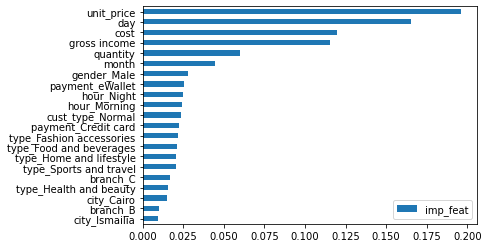

In [27]:
RF_mode = RandomForestRegressor()
RF_mode.fit(x_train,y_train)
imp_feat = pd.DataFrame(RF_mode.feature_importances_, index=x_train.columns, columns=['imp_feat'])
imp_feat.sort_values('imp_feat').plot(kind='barh')
plt.show()

In [28]:
imp_feat.sort_values('imp_feat',ascending=False)

,imp_feat
unit_price,0.196368
day,0.165083
cost,0.119853
gross income,0.115621
quantity,0.060183
month,0.044456
gender_Male,0.028033
payment_eWallet,0.025336
hour_Night,0.024695
hour_Morning,0.024006


### Conclusion

Based on the results of the Machine learning algorithm above, we have two options, namely Decision Tree and Random Forest
1. The first option is Decision Tree. Decision Tree was chosen because this algorithm has a high R-Squared. The point is that this algorithm has a combination of independent variables which together affect the dependent variable by more than 90%.
2. Another option, namely Random Forest is chosen because it has the lowest RMSE score. This means that the lower the RMSE score, the lower the algorithm error rate in making predictions.